In [141]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
sns.set_style(style="white")
sns.set_context("talk")
sns.set_palette("deep")

In [3]:
IDNET_PATH = Path(r"C:\Users\Fred\Documents\Insight\Gait Datasets\IDNet Database\IDNet_dataset")

In [81]:
def construct_path(user_id, walk_num, logtype):
    walkid = f"u{str(user_id).zfill(3)}_w{str(walk_num).zfill(3)}"
    return IDNET_PATH / walkid / f"{walkid}_{logtype}.log"

In [134]:
df = pd.read_csv(construct_path(3, 1, "accelerometer"), sep="\t")
df.head()

,accelerometer_timestamp,accelerometer_x_data,accelerometer_y_data,accelerometer_z_data
0,1442764174967287381,-3.011078,-8.587479,-1.465744
1,1442764174975679715,-3.123474,-8.296005,-2.074982
2,1442764174984072049,-2.754196,-7.667099,-2.635330
3,1442764174992464383,-2.285187,-6.949097,-2.907150
4,1442764175000856717,-1.324997,-6.709717,-2.561157


In [135]:
df["time_s"] = (df["accelerometer_timestamp"] - df["accelerometer_timestamp"][0]) * 1e-9

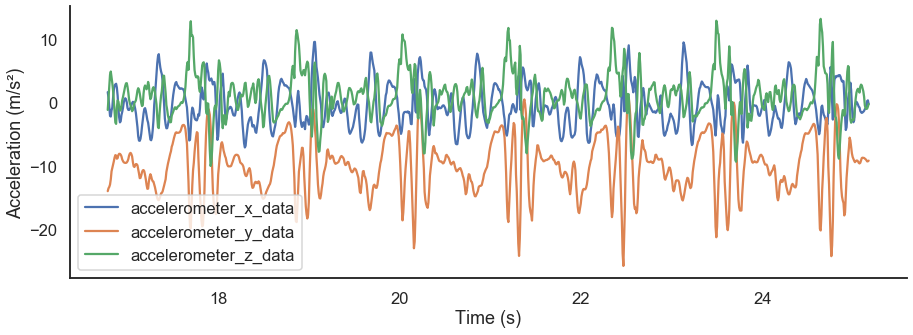

In [143]:
f, ax = plt.subplots(figsize=(15, 5))
df.iloc[2000:3000,:].plot.line(x="time_s", y=["accelerometer_x_data","accelerometer_y_data","accelerometer_z_data"], ax=ax)
ax.set_ylabel("Acceleration (m/s²)")
ax.set_xlabel("Time (s)")
sns.despine()
f.savefig("acc.png", dpi=300, bbox_inches="tight")

In [144]:
# y shows up/down. if acceleration is negative, then phone is facing upside-down